In [107]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
from quspin.tools import evolution
import numpy as np
import matplotlib.pyplot as plt
import math

In [109]:
#define rabi frequency, planks constant and coupling
rabi = 0.780
h = 6063e-34
permittivity = 8.85e-12

r = 2.78e-6 #seperation of particles
theta = 0.0 #angle of system with quantisation axis
ans = (1-(3*(np.cos(theta)**2)))/(r**3) #anisotropic term
mJ = 1.225/np.sqrt(3.0) #(dipole) matrix element (value extracted from 0 electric field case)
J = -(mJ**2)*ans #*(1/h)*(1/(4*math.pi*permittivity))
print(J)

#construct 2 molecule hamiltonian
basis = spin_basis_1d(2, pauli=False)
H_mol = [[0.5*rabi*h, 0], [0.5*rabi*h, 1]]
H_int = [[0.5*h*J, 0, 1]]
static = [['+', H_mol], ['-', H_mol], ['+-', H_int], ['-+', H_int]]
dynamic = []
H = hamiltonian(static, dynamic, basis=basis, dtype=np.float64)

eigval, eigvec = H.eigh()
print(eigval)
print(eigvec)

4.6563597938997816e+16
Hermiticity check passed!
Symmetry checks passed!
[-1.41157547e-14  0.00000000e+00  0.00000000e+00  1.41157547e-14]
[[ 0.          1.          0.          0.        ]
 [ 0.70710678  0.          0.          0.70710678]
 [-0.70710678  0.          0.          0.70710678]
 [ 0.          0.          1.          0.        ]]


In [111]:
#try time evolution of some intital state

initial = [0.0, 1.0, 1.0, 0.0]
times = np.linspace(0.0, 10.0, 10) #times at whcih the state is checked
evolver = H.evolve(initial, 0, times, iterate=True) #generator for states
for i, state in enumerate(evolver):
    print("state is evolved state at time [%i]" % (i))
    print(state)

state is evolved state at time [0]
[0.+0.j 1.+0.j 1.+0.j 0.+0.j]
state is evolved state at time [1]
[0.+0.00000000e+00j 1.-1.56841719e-14j 1.-1.56841719e-14j
 0.+0.00000000e+00j]
state is evolved state at time [2]
[0.+0.00000000e+00j 1.-3.13683438e-14j 1.-3.13683438e-14j
 0.+0.00000000e+00j]
state is evolved state at time [3]
[0.+0.00000000e+00j 1.-4.70525157e-14j 1.-4.70525157e-14j
 0.+0.00000000e+00j]
state is evolved state at time [4]
[0.+0.00000000e+00j 1.-6.27366876e-14j 1.-6.27366876e-14j
 0.+0.00000000e+00j]
state is evolved state at time [5]
[0.+0.00000000e+00j 1.-7.84208595e-14j 1.-7.84208595e-14j
 0.+0.00000000e+00j]
state is evolved state at time [6]
[0.+0.00000000e+00j 1.-9.41050314e-14j 1.-9.41050314e-14j
 0.+0.00000000e+00j]
state is evolved state at time [7]
[0.+0.00000000e+00j 1.-1.09789203e-13j 1.-1.09789203e-13j
 0.+0.00000000e+00j]
state is evolved state at time [8]
[0.+0.00000000e+00j 1.-1.25473375e-13j 1.-1.25473375e-13j
 0.+0.00000000e+00j]
state is evolved state 

In [113]:
from quspin.basis import spin_basis_1d  # Hilbert space spin basis
from quspin.tools.measurements import ED_state_vs_time
import numpy as np  # generic math functions

#
L = 2  # system size
# coupling strenghts
h = 0.8945  # x-field strength
g = 0.945  # z-field strength
# create site-coupling lists
x_field = [[h, i] for i in range(L)]
z_field = [[g, i] for i in range(L)]
# create static and dynamic lists
static_1 = [["x", x_field], ["z", z_field]]
dynamic = []
# create spin-1/2 basis
basis1 = spin_basis_1d(L, kblock=0, pblock=1)
# set up Hamiltonian
H1 = hamiltonian(static_1, dynamic, basis=basis1, dtype=np.float64)
# compute eigensystem of H1
E1, V1 = H1.eigh()
psi1 = V1[0]  # pick any state as initial state
# time-evolve state by decomposing it in an eigensystem (E1,V1)
times = np.linspace(0.0, 5.0, 10)
psi1_time = ED_state_vs_time(psi1, E1, V1, times, iterate=False)
print(type(psi1_time))
# same as above but using a generator
psi1_t = ED_state_vs_time(psi1, E1, V1, times, iterate=True)
print(type(psi1_t))
for i, psi1_n in enumerate(psi1_t):
    print("psi1_n is now the evolved state at time[%i]" % (i))
    print(psi1_n)

Hermiticity check passed!
Symmetry checks passed!
<class 'numpy.ndarray'>
<class 'generator'>
psi1_n is now the evolved state at time[0]
[ 0.13687728+0.j -0.4860903 +0.j  0.86312272+0.j]
psi1_n is now the evolved state at time[1]
[ 0.0170657 +0.13580925j -0.06060516-0.48229741j  0.10761312+0.85638791j]
psi1_n is now the evolved state at time[2]
[-0.13262182+0.03386507j  0.47097794-0.12026454j -0.83628857+0.21354686j]
psi1_n is now the evolved state at time[3]
[-0.05013596-0.12736473j  0.17804711+0.45230853j -0.31614805-0.80313837j]
psi1_n is now the evolved state at time[4]
[ 0.12012003-0.06562444j -0.42658054+0.23305112j  0.75745464-0.41381554j]
psi1_n is now the evolved state at time[5]
[ 0.08008881+0.11100078j -0.28441822-0.39419546j  0.50502515+0.69995031j]
psi1_n is now the evolved state at time[6]
[-0.10014928+0.09330333j  0.35565868-0.33134677j -0.63152276+0.58835349j]
psi1_n is now the evolved state at time[7]
[-0.10506179-0.08773488j  0.37310442+0.31157161j -0.66250017-0.55323

In [117]:
#add microwave coupling (same detuning for both molecules)

detuning = 200

H_couple1 = [[-h*detuning*0.5, 0], [-h*detuning*0.5, 1]]
H_couple2 = [[-h*detuning*0.5, 0],[h*detuning*0.5, 1]]

static = [['+', H_mol], ['-', H_mol], ['+-', H_int], ['-+', H_int], ['I', H_couple1], ['z', H_couple2]] #same as before apart form final two terms
dynamic = []
H_full = hamiltonian(static, dynamic, basis=basis, dtype=np.float64)

#find eigenvalues/eigenvectors
eigval, eigvec = H_full.eigh()
print(eigval)
print(eigvec)

Hermiticity check passed!
Symmetry checks passed!
[-268.35 -178.9  -178.9   -89.45]
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [119]:
#timme evolution of Hamiltonian with microwave coupling
initial = [1.0, 0.0, 0.0, 0.0]
times = np.linspace(0.0, 10.0, 10) #times at whcih the state is checked
evolver = H_full.evolve(initial, 0, times, iterate=True) #generator for states
for i, state in enumerate(evolver):
    print("state is evolved state at time [%i]" % (i))
    print(state)

state is evolved state at time [0]
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
state is evolved state at time [1]
[-0.65437499-0.75617018j  0.        +0.j          0.        +0.j
  0.        +0.j        ]
state is evolved state at time [2]
[-0.14358672+0.98963771j  0.        +0.j          0.        +0.j
  0.        +0.j        ]
state is evolved state at time [3]
[0.84229409-0.53901818j 0.        +0.j         0.        +0.j
 0.        +0.j        ]
state is evolved state at time [4]
[-0.95876566-0.28419766j  0.        +0.j          0.        +0.j
  0.        +0.j        ]
state is evolved state at time [5]
[0.41249048+0.91096185j 0.        +0.j         0.        +0.j
 0.        +0.j        ]
state is evolved state at time [6]
[0.41891873-0.90802365j 0.        +0.j         0.        +0.j
 0.        +0.j        ]
state is evolved state at time [7]
[-0.96075035+0.27741411j  0.        +0.j          0.        +0.j
  0.        +0.j        ]
state is evolved state at time [8]
[0.83846328+0.54495791j 0.    

In [103]:
#detuning v eigenstate graph
detuning = 0.0
detun = []
pop = []

for i in range(15):
    detuning = detuning + (i*5e-16)
    detun = detun + [detuning]

    H_couple1 = [[-h*detuning*0.5, 0], [-h*detuning*0.5, 1]]
    H_couple2 = [[-h*detuning*0.5, 0],[h*detuning*0.5, 1]]

    itr_static = [['+', H_mol], ['-', H_mol], ['+-', H_int], ['-+', H_int], ['I', H_couple1], ['z', H_couple2]] #same as before apart form final two terms
    itr_dynamic = []
    H_full_itr = hamiltonian(itr_static, itr_dynamic, basis=basis, dtype=np.float64)
    
    itr_eigval, itr_eigvec = H_full_itr.eigh()
    pop = pop + [(itr_eigvec[1][0])**2]

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


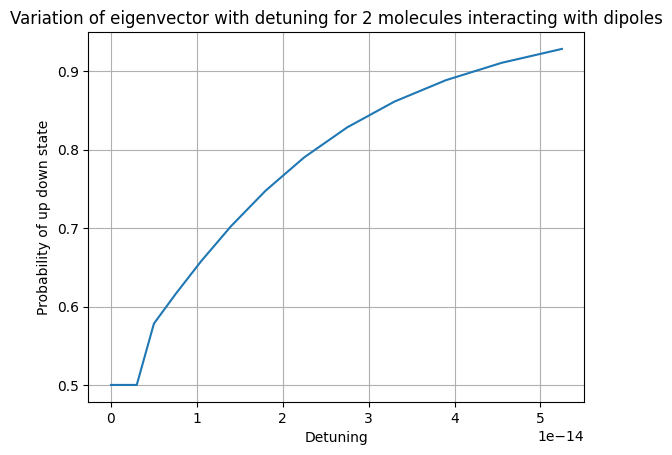

In [105]:
fig, ax = plt.subplots()
ax.plot(detun, pop)

ax.set(xlabel='Detuning', ylabel='Probability of up down state',
       title=f'Variation of eigenvector with detuning for 2 molecules interacting with dipoles')
ax.grid()

plt.show()